# Genera una gráfica de serie de tiempo por estado para la marca con mayor precio -en todos los años-, donde el eje equis es el año y el eje ye es el precio máximo.

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print(os.getcwd())


/Users/sofiagerard/Github/ITAM/MGE/adpd_Partial/entregables


In [ ]:
# read data
df = pd.read_csv('/Users/sofiagerard/Desktop/profeco_local/serie_estado.csv')


In [6]:
df

,estado,producto,marca,anio,precio_maximo
0,aguascalientes,copa menstrual,saba cup,2023,609.0
1,aguascalientes,copa menstrual,saba cup,2024,609.0
2,baja california,copa menstrual,diva cup 1,2021,600.0
3,baja california,copa menstrual,diva cup 1,2022,614.0
4,baja california sur,copa menstrual,diva cup 2,2021,690.0
...,...,...,...,...,...
81,yucatan,copa menstrual,saba cup,2023,580.0
82,yucatan,copa menstrual,saba cup,2024,580.0
83,zacatecas,copa menstrual,diva cup 2,2022,690.0
84,zacatecas,copa menstrual,diva cup 2,2023,690.0


In [8]:
# Agrupar por estado, producto y marca, y calcular precio promedio
precios_promedio = (
    df.groupby(["estado", "producto", "marca"])
    .agg(precio_promedio=('precio_maximo', 'mean'))
    .reset_index()
)

# Para cada estado, quedarnos con el (producto, marca) con mayor promedio
productos_top = (
    precios_promedio
    .sort_values(['estado', 'precio_promedio'], ascending=[True, False])
    .drop_duplicates(subset=['estado'])
)

# Revisar la tabla resultante
productos_top.head()


,estado,producto,marca,precio_promedio
0,aguascalientes,copa menstrual,saba cup,609.0
1,baja california,copa menstrual,diva cup 1,607.0
2,baja california sur,copa menstrual,diva cup 2,690.0
3,campeche,copa menstrual,saba cup,580.0
4,chiapas,copa menstrual,saba cup,580.0


In [9]:
# Unir con el DataFrame original para quedarnos solo con las combinaciones seleccionadas
df_filtrado = pd.merge(
    df,
    productos_top[['estado', 'producto', 'marca']],
    on=['estado', 'producto', 'marca']
)

# Verificar el resultado
df_filtrado.head()


,estado,producto,marca,anio,precio_maximo
0,aguascalientes,copa menstrual,saba cup,2023,609.0
1,aguascalientes,copa menstrual,saba cup,2024,609.0
2,baja california,copa menstrual,diva cup 1,2021,600.0
3,baja california,copa menstrual,diva cup 1,2022,614.0
4,baja california sur,copa menstrual,diva cup 2,2021,690.0


In [11]:
# Crear una columna combinada que incluya estado + producto + marca
df_filtrado["etiqueta"] = (
    df_filtrado["estado"] + " - " + df_filtrado["producto"] + " (" + df_filtrado["marca"] + ")"
)


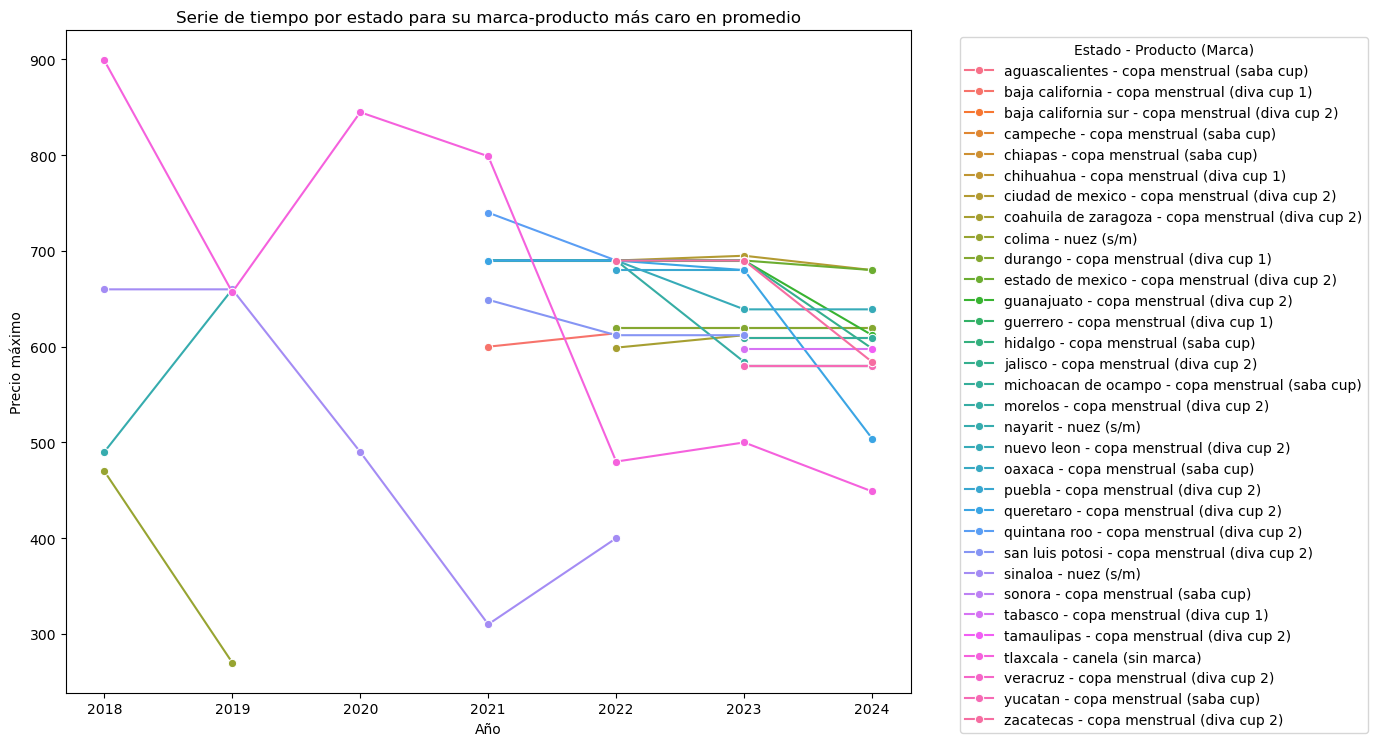

In [12]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_filtrado, x="anio", y="precio_maximo", hue="etiqueta", marker="o")

# Estética
plt.title("Serie de tiempo por estado para su marca-producto más caro en promedio")
plt.xlabel("Año")
plt.ylabel("Precio máximo")
plt.xticks(sorted(df_filtrado["anio"].unique()))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Estado - Producto (Marca)")
plt.tight_layout()
plt.show()


## Análisis de Precios Máximos por Estado: Producto-Marca Más Caro

### 📌 Filtrado de datos

Para construir la gráfica de serie de tiempo por estado, seguimos el siguiente criterio:

1. **Agrupamos los datos por estado, producto y marca**, calculando el **precio promedio** de cada combinación.
2. **Seleccionamos, para cada estado, la combinación de producto y marca con el mayor precio promedio** a lo largo de todos los años disponibles.
3. Con esas combinaciones seleccionadas, **filtramos el DataFrame original** para conservar únicamente las observaciones correspondientes.
4. Finalmente, **desagregamos el precio máximo por año** para cada estado con su producto-marca más costoso, y construimos la gráfica de líneas.

### 📈 Interpretación de la gráfica

Cada línea representa un estado de la república mexicana.  
En cada caso, se graficó la **serie de tiempo del precio máximo anual** correspondiente al **producto-marca con el precio promedio más alto en ese estado**, considerando todos los años disponibles.

Este enfoque **no compara el mismo producto o marca entre estados**, sino que **resalta el artículo más caro (en promedio) dentro de cada estado** y muestra su evolución de precios a lo largo del tiempo.

Sin embargo, una **limitación importante** es que **no todos los productos están presentes en todos los años** del periodo analizado. Esto significa que muchas de las series están **truncadas o incompletas**, ya que al elegir un solo producto por estado, solo se grafican los años en los que hubo registros para ese artículo específico.

A pesar de esta limitación, el enfoque permite identificar patrones de precios máximos de los artículos más costosos dentro de cada entidad federativa.
